# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [3]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp2_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(31, 49)
Wall time: 34.9 ms


,Elapsed,Normal + DMEM + DMSO,EV + DMEM + DMSO,WT1 + DMEM + DMSO,dVSR(1) + DMEM + DMSO,WT2 + DMEM + DMSO,dVSR(2) + DMEM + DMSO,Normal + DMEM + BAF,EV + DMEM + BAF,WT1 + DMEM + BAF,...,WT1 + Starvation + DMSO (Std Err Img),dVSR(1) + Starvation + DMSO (Std Err Img),WT2 + Starvation + DMSO (Std Err Img),dVSR(2) + Starvation + DMSO (Std Err Img),Normal + Starvation + BAF (Std Err Img),EV + Starvation + BAF (Std Err Img),WT1 + Starvation + BAF (Std Err Img),dVSR(1) + Starvation + BAF (Std Err Img),WT2 + Starvation + BAF (Std Err Img),dVSR(2) + Starvation + BAF (Std Err Img)
26,52.0,85.69460,78.60030,81.41359,92.55900,94.26760,97.52869,46.02570,39.98709,37.41099,...,11.73978,3.105790,8.205128,12.22082,3.003003,5.876376,0.847836,7.138566,7.456983,0.795645
27,54.0,86.74384,80.15505,82.41169,91.28027,92.08286,95.47397,40.07405,34.04238,31.98980,...,12.54825,4.488354,6.034337,10.43569,3.132696,4.774844,0.621607,6.104240,4.830581,0.820528
28,56.0,89.09334,92.93846,94.77729,97.78130,97.29813,98.57506,40.80393,31.53383,29.32455,...,24.26303,10.453150,9.995469,15.44943,4.561829,6.711931,1.353637,5.047359,7.395585,1.130834
29,58.0,92.10947,85.85320,90.08450,96.05569,95.85699,98.41440,37.43993,31.86169,30.36393,...,14.06151,4.899619,7.065463,10.51716,2.545754,5.339599,0.969155,6.250226,7.712258,0.466084
30,60.0,93.58721,92.98689,94.72569,98.30971,98.67882,99.33318,39.16290,33.85468,30.93474,...,16.66569,3.205701,6.561261,10.37676,2.876211,5.839258,0.729399,8.226239,7.556342,0.924157


In [4]:
#I have 6 cell lines per condition and 4 conditions
#List of Columns
##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


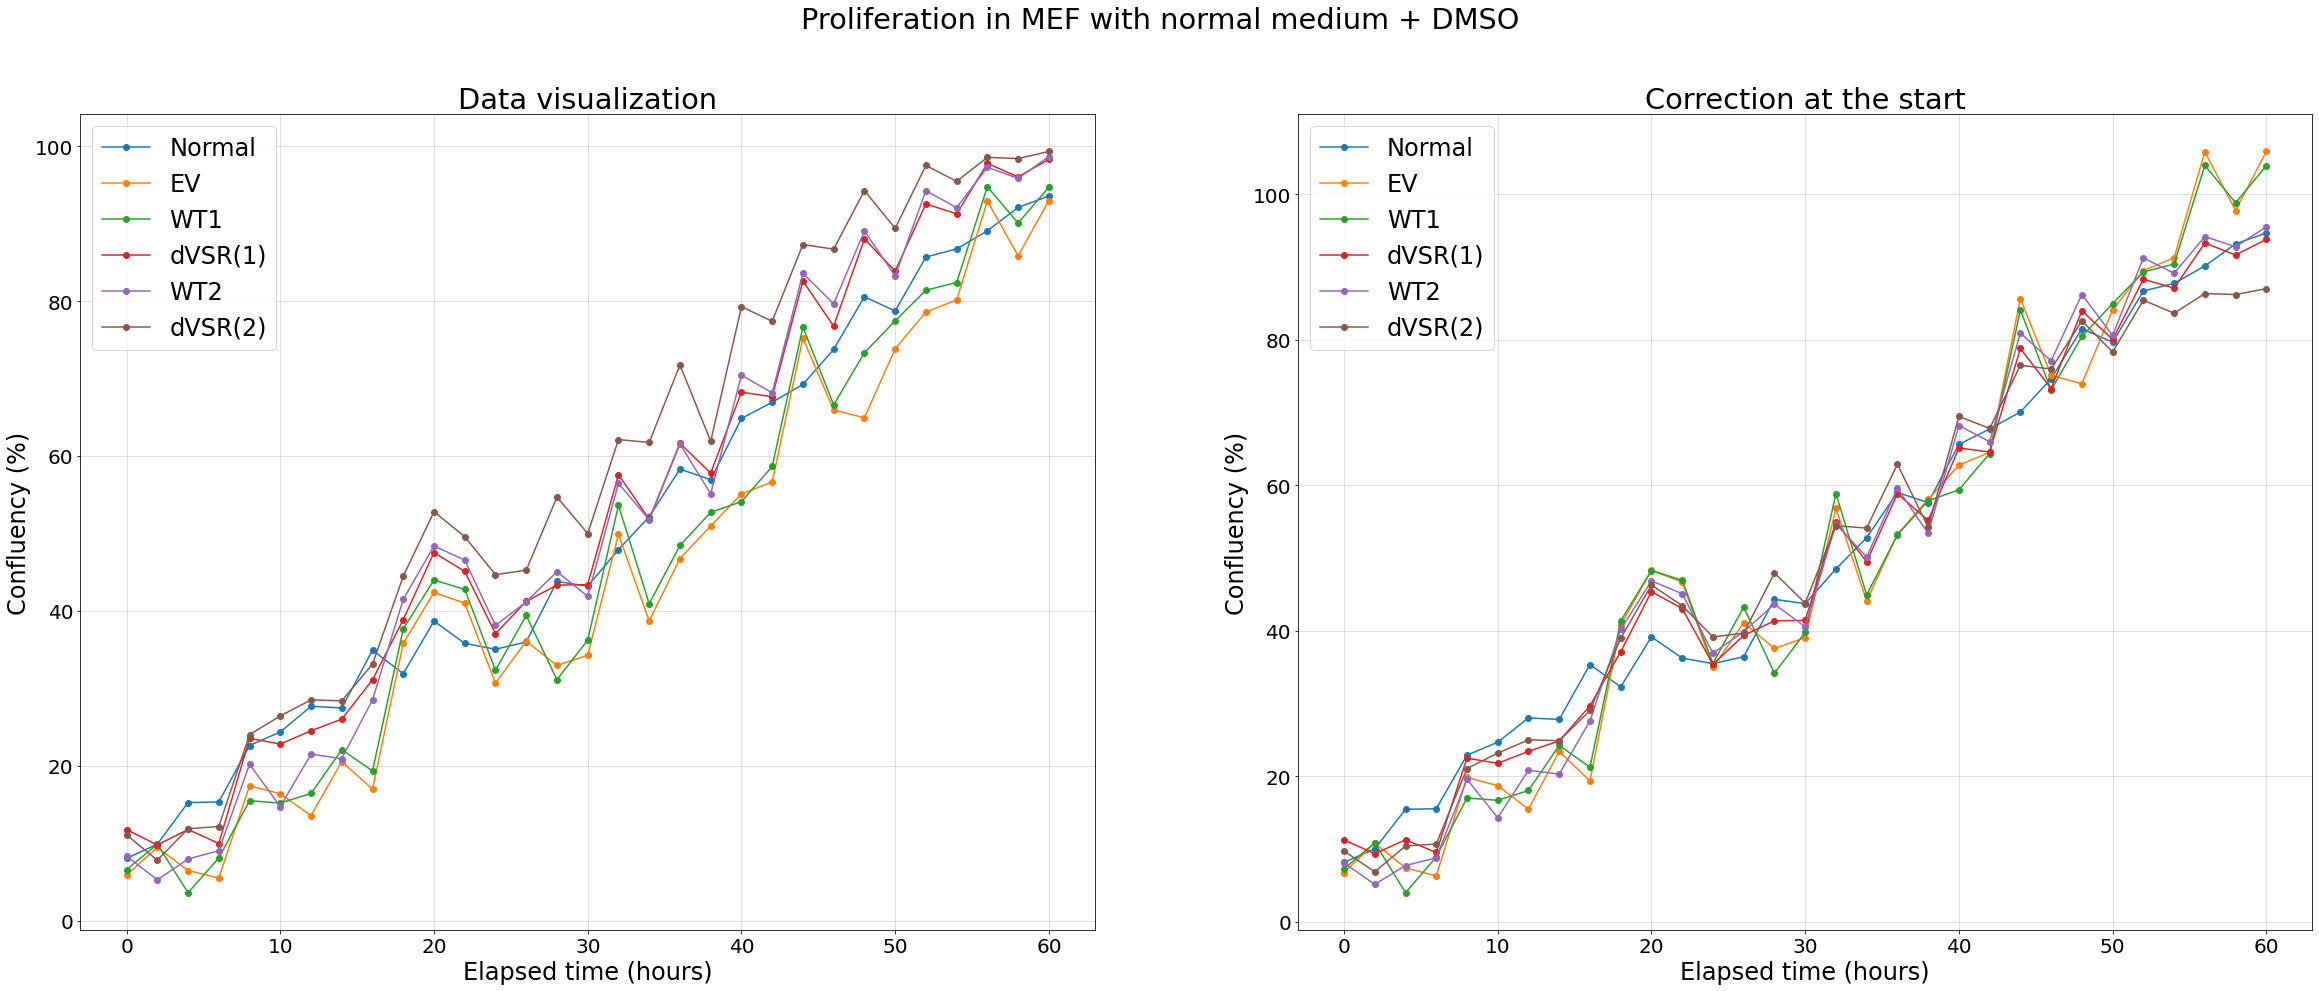

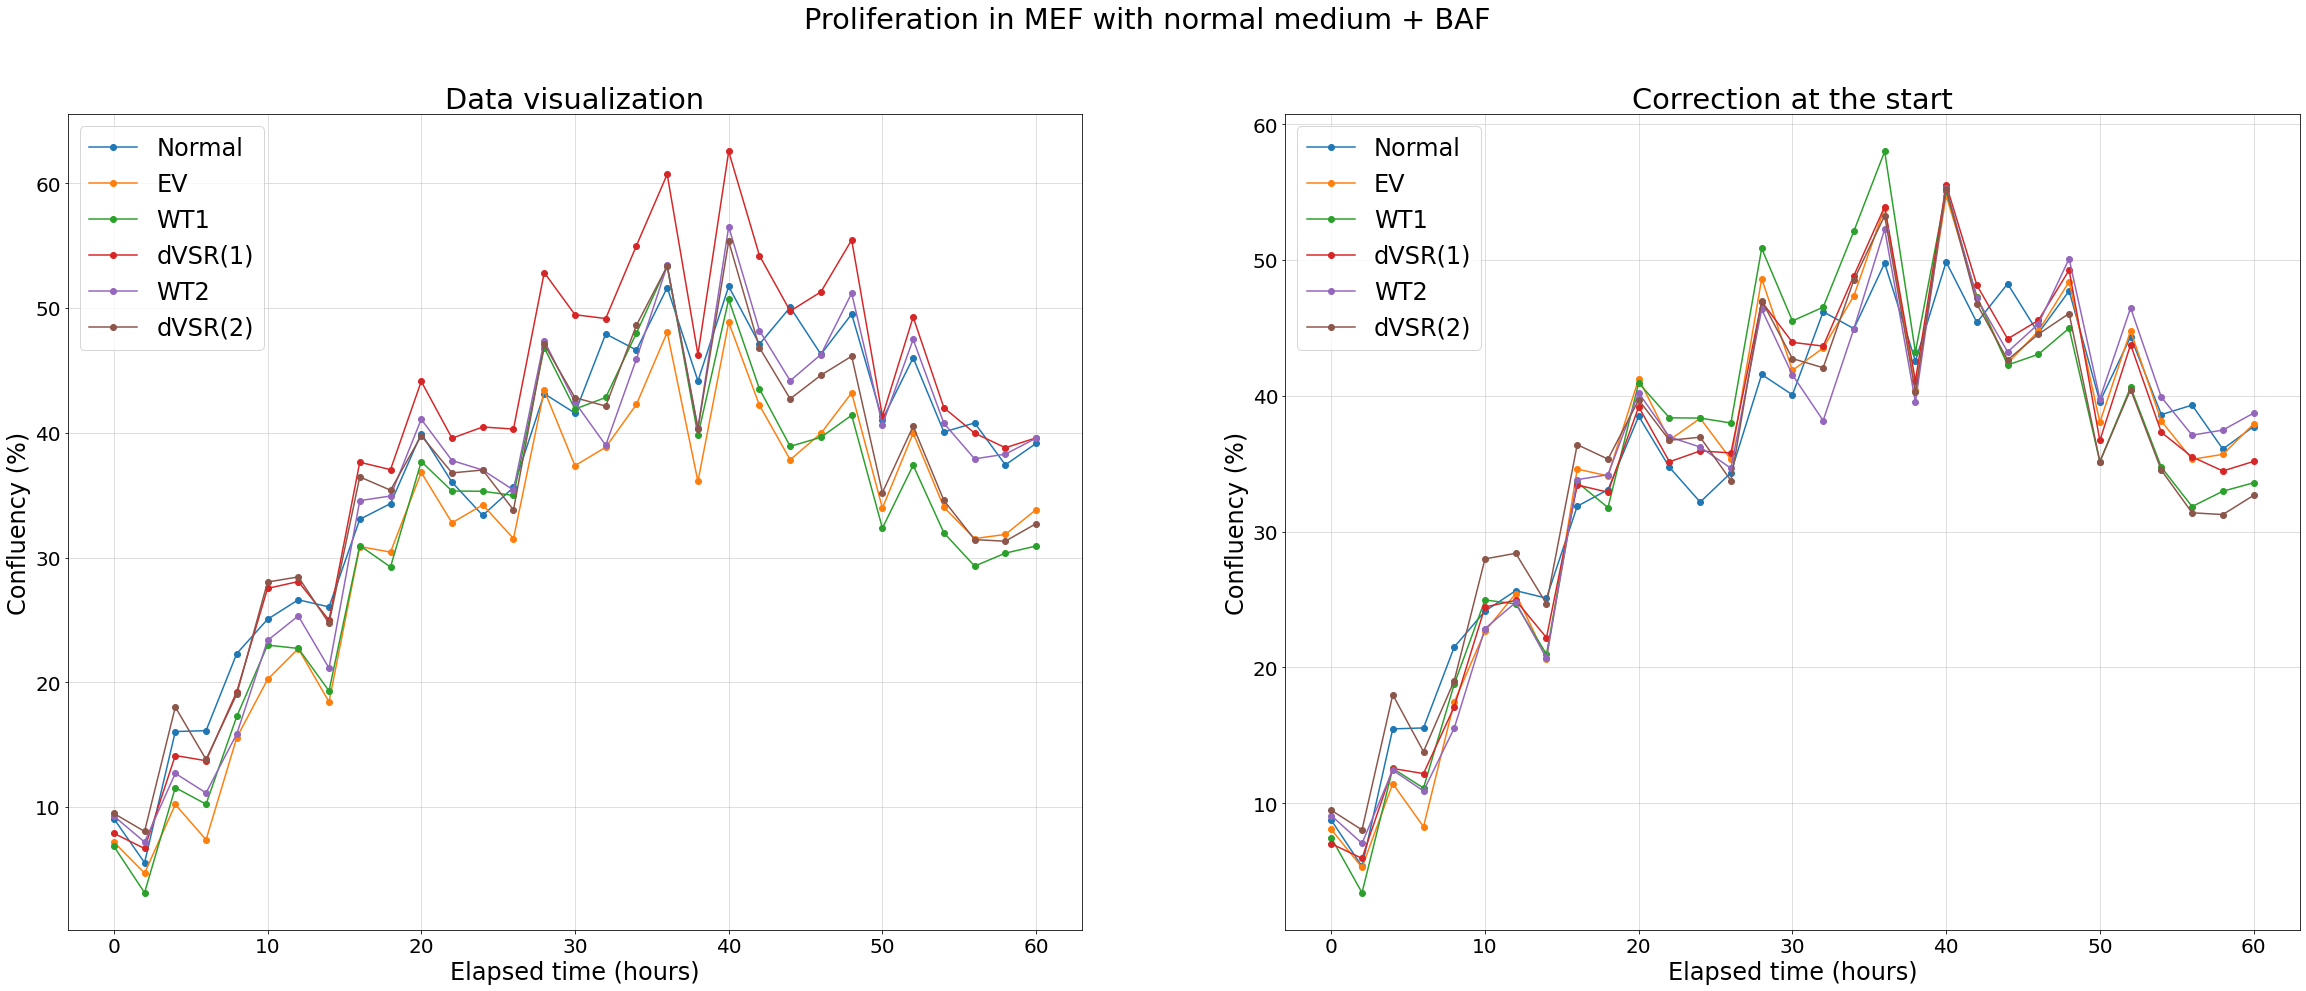

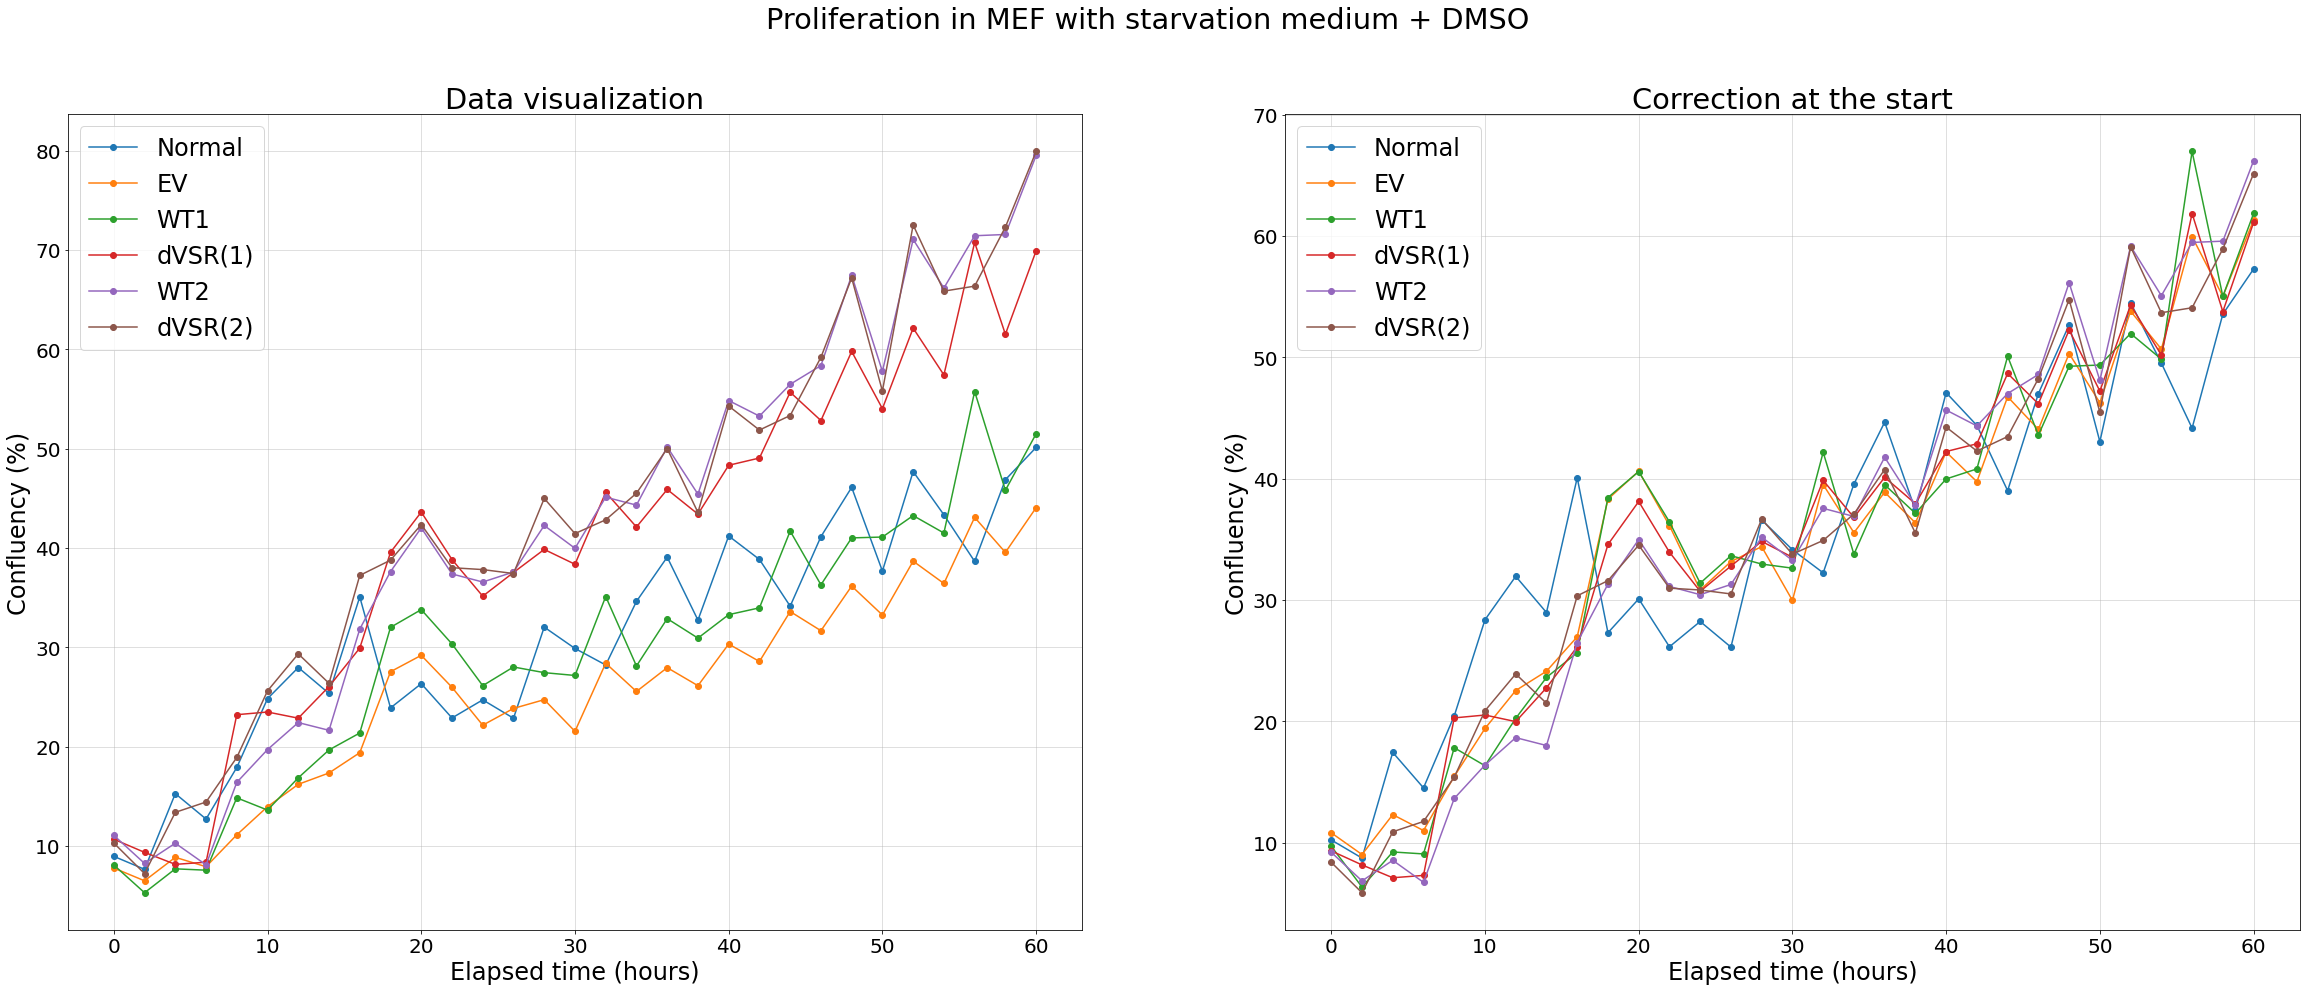

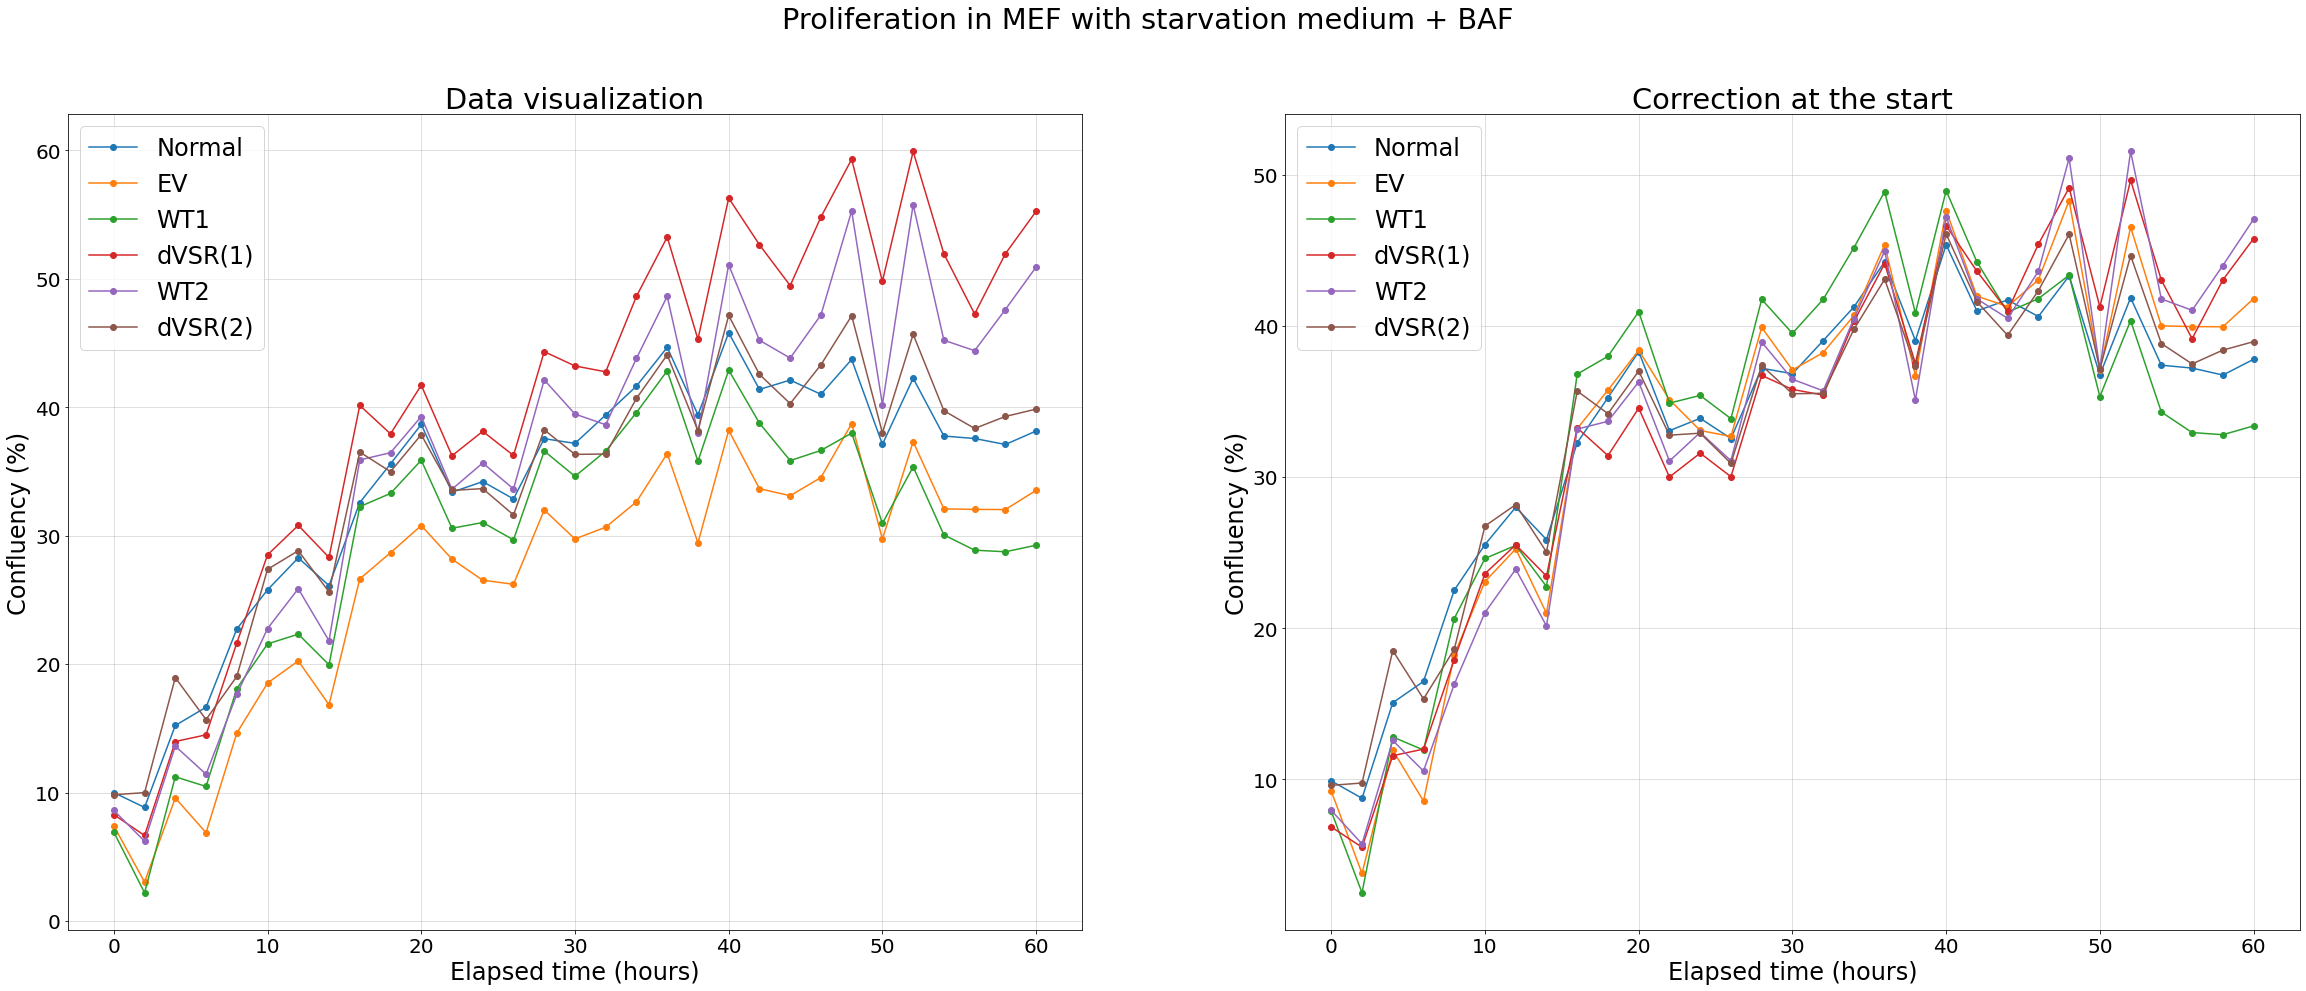

In [5]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data

        #save Corrected_data
        path = output_file_directory + 'ATG7/MEF/Proliferation/data_for_input/'
        corrected_data.to_csv(path+drug+'_exp2.csv',sep = ",", index=False)
        
        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/ATG7/Proliferation/exp2/graph_exp2_rich_dmso.svg'

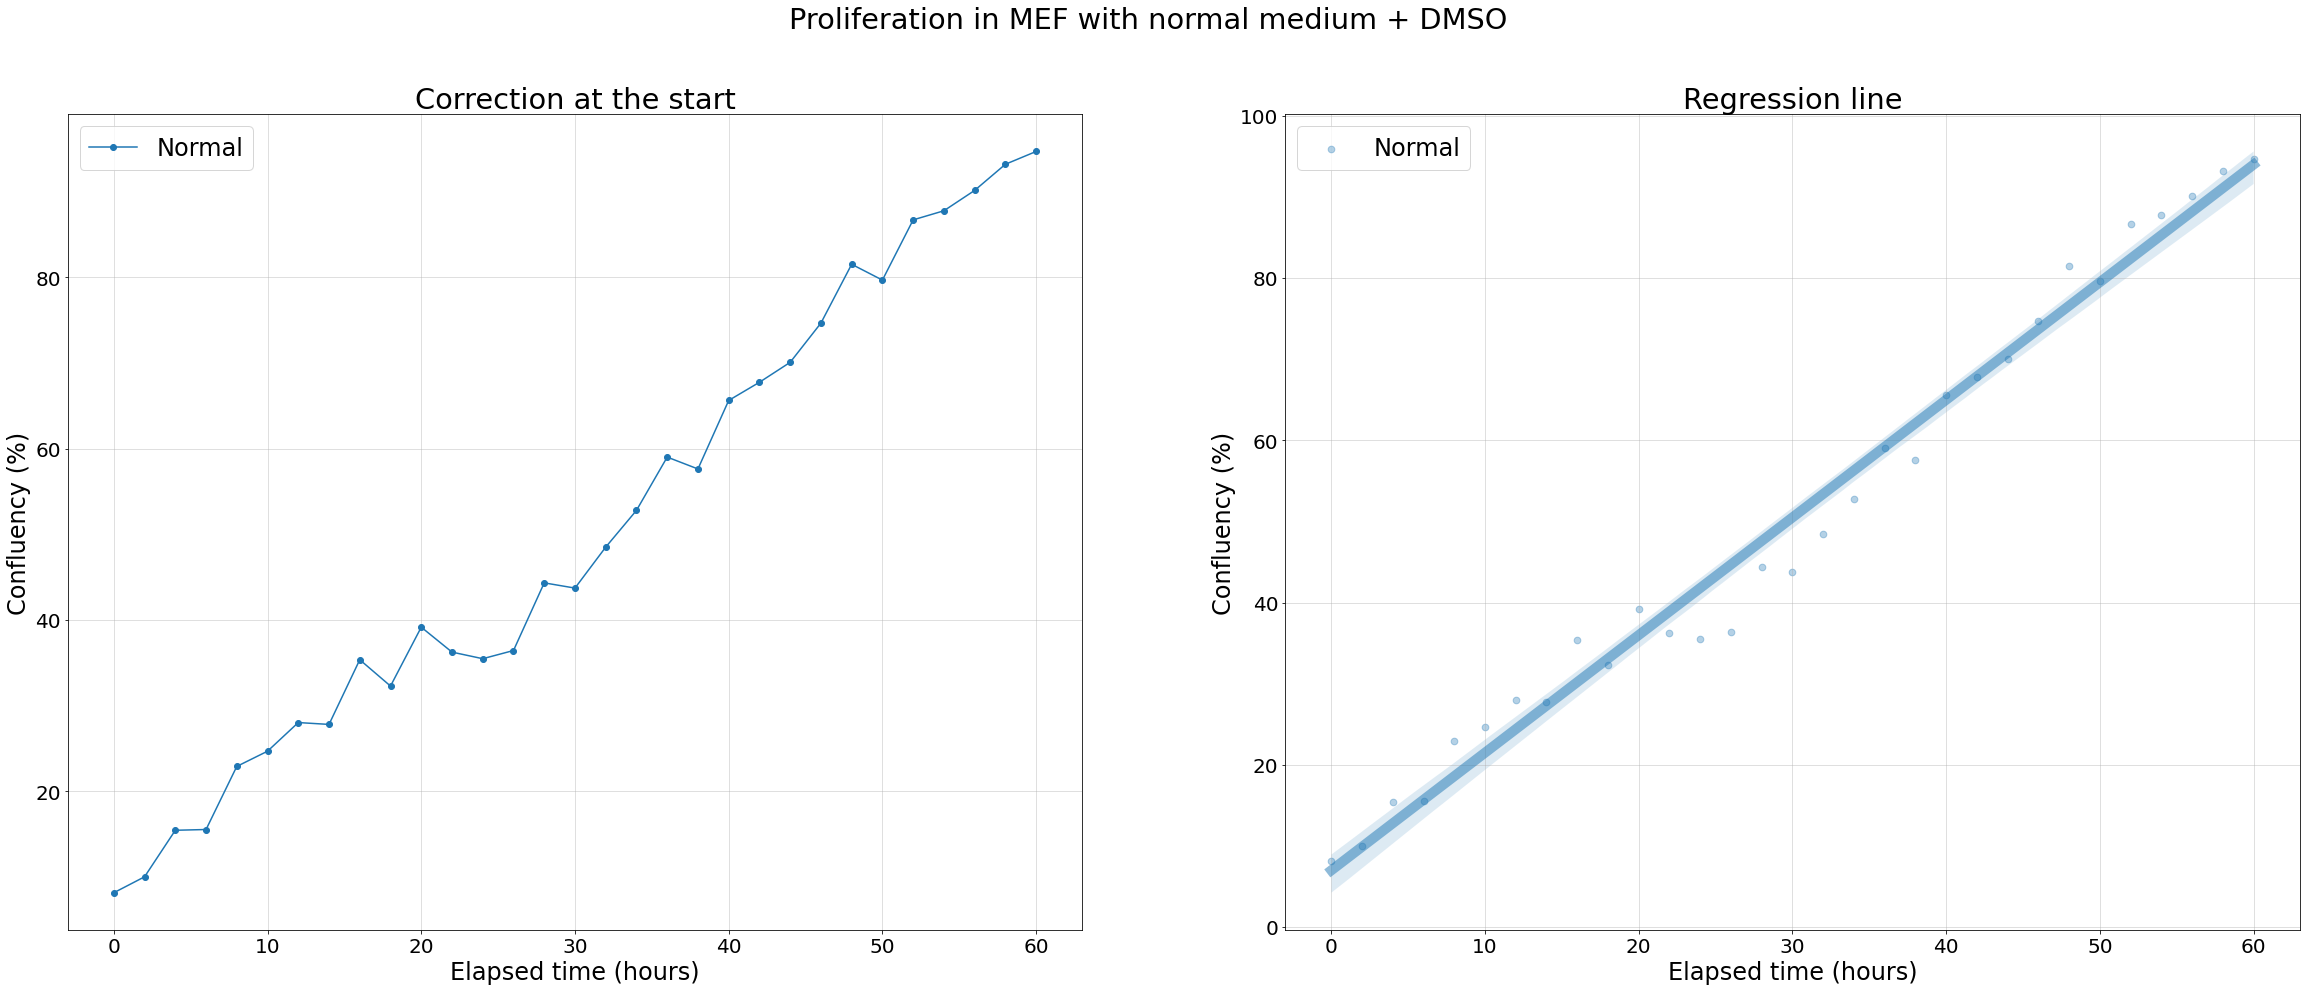

In [6]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    list_ = [0,1,2,4] #represent norm/EV/WT1/WT2 delete list_ to have all
    for column in col_selection[list_]: 
        label_ = column.split(' ')[0]
           
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
            
        #save the graphs
        path = output_file_directory + 'ATG7/Proliferation/exp2/graph_exp2_'    
        fig.savefig(path+drug+'.svg')
        print()